# Analizando Séries Temporais

In [3]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
# Buscando os dados da ação da Apple
apple = yf.Ticker('AAPL')
apple_data = apple.history(period='1y')
apple_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-08-15 00:00:00-04:00,177.969328,178.566264,176.148643,176.546600,43622600,0.0,0.0
2023-08-16 00:00:00-04:00,176.228228,177.631038,175.601431,175.671082,46964900,0.0,0.0
2023-08-17 00:00:00-04:00,176.238164,176.606276,172.596794,173.114151,66062900,0.0,0.0
2023-08-18 00:00:00-04:00,171.422816,174.208564,171.084551,173.601669,61114200,0.0,0.0
2023-08-21 00:00:00-04:00,174.178725,175.233326,172.855494,174.944794,46311900,0.0,0.0


In [5]:
print('Tipo dos dados:', type(apple_data))
print('Dimensões dos dados:', apple_data.shape)
print('Colunas dos dados:', apple_data.columns)
print('Informações dos dados:', apple_data.info())

Tipo dos dados: <class 'pandas.core.frame.DataFrame'>
Dimensões dos dados: (253, 7)
Colunas dos dados: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-08-15 00:00:00-04:00 to 2024-08-15 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    int64  
 5   Dividends     253 non-null    float64
 6   Stock Splits  253 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.8 KB
Informações dos dados: None


In [6]:
print('Tipo do índice:', type(apple_data.index))

Tipo do índice: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [7]:
print('Valores do índice:', apple_data.index)

Valores do índice: DatetimeIndex(['2023-08-15 00:00:00-04:00', '2023-08-16 00:00:00-04:00',
               '2023-08-17 00:00:00-04:00', '2023-08-18 00:00:00-04:00',
               '2023-08-21 00:00:00-04:00', '2023-08-22 00:00:00-04:00',
               '2023-08-23 00:00:00-04:00', '2023-08-24 00:00:00-04:00',
               '2023-08-25 00:00:00-04:00', '2023-08-28 00:00:00-04:00',
               ...
               '2024-08-02 00:00:00-04:00', '2024-08-05 00:00:00-04:00',
               '2024-08-06 00:00:00-04:00', '2024-08-07 00:00:00-04:00',
               '2024-08-08 00:00:00-04:00', '2024-08-09 00:00:00-04:00',
               '2024-08-12 00:00:00-04:00', '2024-08-13 00:00:00-04:00',
               '2024-08-14 00:00:00-04:00', '2024-08-15 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=253, freq=None)


<Axes: title={'center': 'Preço de Fechamento da Ação da Apple'}, xlabel='Date'>

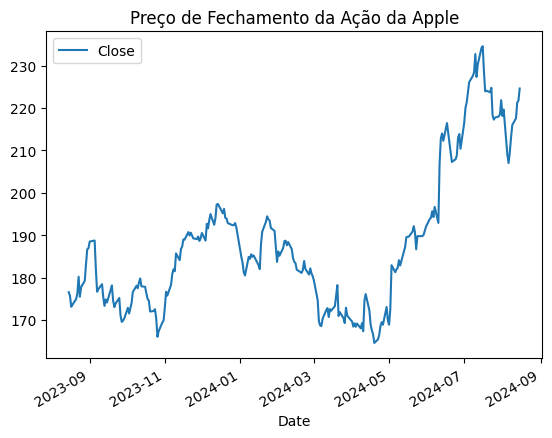

In [8]:
apple_data.plot(y='Close', title='Preço de Fechamento da Ação da Apple')

In [ ]:
# Instalação do statsmodels 
!pip install statsmodels

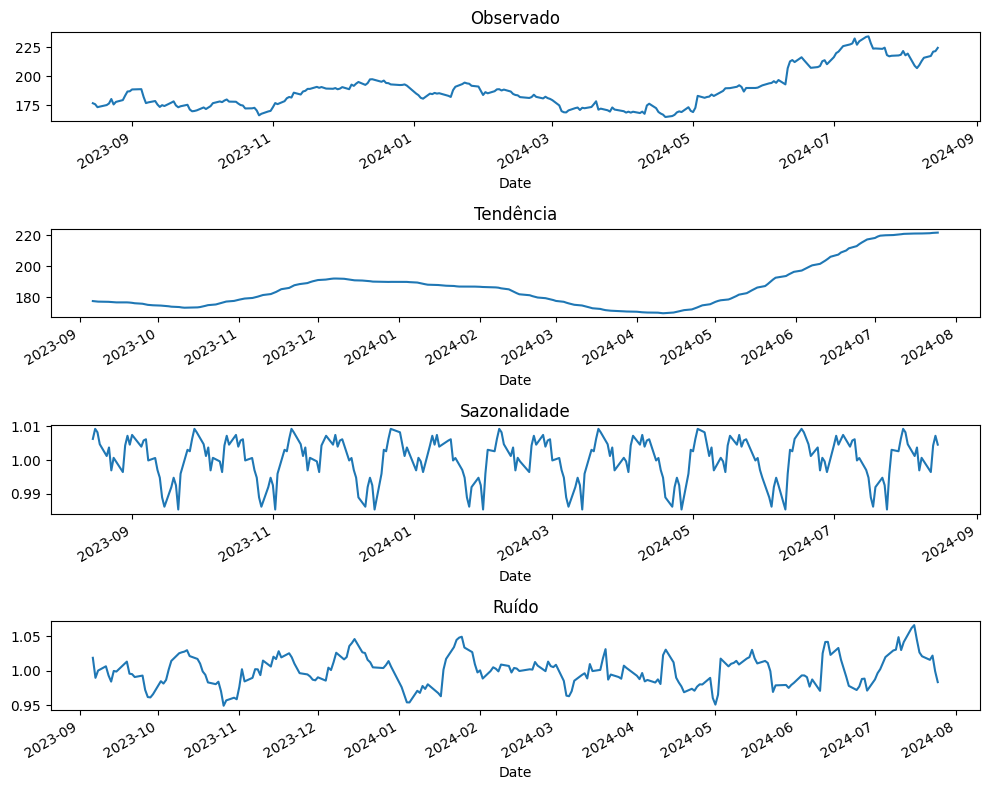

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompondo a série temporal
decomposition = seasonal_decompose(apple_data['Close'], model='multiplicative', period=30)

# Plotando a decomposição
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decomposition.observed.plot(ax=axes[0], title='Observado')
decomposition.trend.plot(ax=axes[1], title='Tendência')
decomposition.seasonal.plot(ax=axes[2], title='Sazonalidade')
decomposition.resid.plot(ax=axes[3], title='Ruído')
plt.tight_layout()

In [11]:
# Teste de estácionariedade
from statsmodels.tsa.stattools import adfuller

# Teste de Dickey-Fuller
result = adfuller(apple_data['Close'])
print('Estatística do teste:', result[0])
print('Valor-p:', result[1])
print('Valores críticos:', result[4])

Estatística do teste: -0.44400742552130734
Valor-p: 0.9024877797305422
Valores críticos: {'1%': np.float64(-3.4565688966099373), '5%': np.float64(-2.8730786194395455), '10%': np.float64(-2.5729189953388762)}


<Axes: title={'center': 'Diferença dos Dados'}, xlabel='Date'>

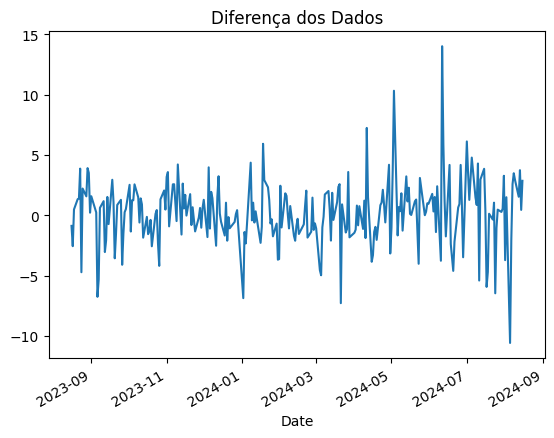

In [12]:
# Aplicando diferenciação
# Diferenciando os dados
apple_data['Close_diff'] = apple_data['Close'].diff()
apple_data['Close_diff'].plot(title='Diferença dos Dados')

In [14]:
# Teste de Dickey-Fuller
result = adfuller(apple_data['Close_diff'].dropna())
print('Estatística do teste:', result[0])
print('Valor-p:', result[1])
print('Valores críticos:', result[4])

Estatística do teste: -14.465056004004733
Valor-p: 6.748383104429998e-27
Valores críticos: {'1%': np.float64(-3.4566744514553016), '5%': np.float64(-2.8731248767783426), '10%': np.float64(-2.5729436702592023)}


In [ ]:
!pip install pmdarima